In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1]])

In [3]:
walk_vs_stop = np.array([0,1,0,1,1,0])

In [79]:
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1
input = streetlights[0]
goal_prediction = walk_vs_stop[0]

ls = []

for iteration in range(100):
    prediction = input.dot(weights)
    error = (prediction - goal_prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (input * delta))
    # print("Error:" + str(error) + " Prediction:" + str(prediction))
    ls.append([error, prediction, *weights])
    # print(f"Error: {error:2f} Prediction: {prediction:2f}")

df = pd.DataFrame(ls, columns=['error', 'prediction', 'w1', 'w2', 'w3'])
df


In [89]:
ls = []
# weights = np.array([0.5,0.48,-0.7])
np.random.seed(1)
weights = 2 * np.random.random((3,1)) - 1

for iteration in range(100):
    prediction = streetlights.dot(weights)
    error = (prediction - walk_vs_stop) ** 2
    delta = prediction - walk_vs_stop
    weights = weights - (alpha * np.dot(streetlights.T, delta))
    # if iteration % 10 == 0:
    #     ls.append([np.sum(error),str(prediction), *weights])
    ls.append([np.sum(error),str(prediction), *weights])
    # print("Error:" + str(np.sum(error)) + " Prediction:" + str(prediction))
df = pd.DataFrame(ls, columns=['error', 'prediction', 'w1', 'w2', 'w3'])
df

,error,prediction,w1,w2,w3
0,78.257430,[[-1.16572724]\n [-0.55912226]\n [-0.99977125]...,"[0.13969728300476508, 0.4396972830047652, 0.13...","[0.6249812649880996, 0.9249812649880996, 0.624...","[-0.4823163990329633, 0.11768360096703678, -0...."
1,5.983377,[[-0.34261912 0.55738088 -0.34261912 0.55738...,"[0.17998489131441459, 0.47998489131441463, 0.1...","[0.5682120769010822, 0.8682120769010822, 0.568...","[-0.4223301240110447, 0.23766987598895528, -0...."
2,4.652473,[[-0.24234523 0.71765477 -0.24234523 0.71765...,"[0.1958672534332954, 0.47786725343329545, 0.19...","[0.5064490019026295, 0.7884490019026295, 0.506...","[-0.3933911400690669, 0.29060885993093305, -0...."
3,3.860685,[[-0.19752389 0.76847611 -0.19752389 0.76847...,"[0.2044795192337639, 0.46847951923376396, 0.20...","[0.4529449180092312, 0.7169449180092312, 0.452...","[-0.3680513326284042, 0.33634866737159574, -0...."
4,3.245006,[[-0.16357181 0.80482819 -0.16357181 0.80482...,"[0.20825657145123286, 0.45533657145123296, 0.2...","[0.40702889047160673, 0.6541088904716067, 0.40...","[-0.3444478642242602, 0.3789121357757398, -0.3..."
...,...,...,...,...,...
95,0.000017,[[-9.46514123e-05 9.99829330e-01 -9.46514123e...,"[0.0007404572288831217, 0.0013351480160469732,...","[0.0007404575305618722, 0.0013351483177257263,...","[-0.0008290405034955968, 0.9985051240775917, -..."
96,0.000015,[[-8.85832746e-05 9.99840272e-01 -8.85832746e...,"[0.000692986458210677, 0.0012495515561827832, ...","[0.0006929866995536775, 0.0012495517975257776,...","[-0.0007758906292317369, 0.9986009607309049, -..."
97,0.000013,[[-8.29041710e-05 9.99850512e-01 -8.29041710e...,"[0.0006485590395616272, 0.0011694426903039025,...","[0.0006485592326360276, 0.001169442883378308, ...","[-0.0007261481990220012, 0.9986906532862494, -..."
98,0.000011,[[-7.75891595e-05 9.99860096e-01 -7.75891595e...,"[0.0006069798641361367, 0.0010944696090000828,...","[0.0006069800185956569, 0.0010944697634596215,...","[-0.0006795947612680969, 0.9987745956423951, -..."


<AxesSubplot: >

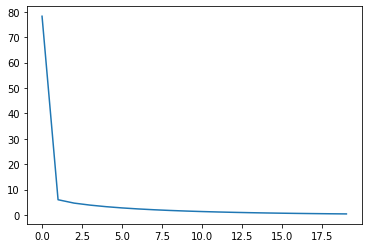

In [91]:
df['error'][:20].plot()

In [92]:
from sklearn.datasets import load_digits

In [93]:
digits = load_digits()

In [94]:
digits.data.shape

(1797, 64)

In [95]:
digits.target.shape

(1797,)

In [96]:
digits.images.shape

(1797, 8, 8)

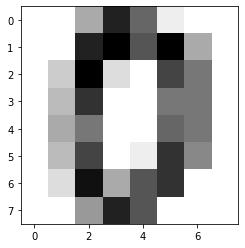

In [97]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [98]:
digits.target[0]

0

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [101]:
X_train.shape

(1437, 64)

In [102]:
X_test.shape

(360, 64)

In [103]:
y_train.shape

(1437,)

In [104]:
y_test.shape

(360,)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logisticRegr = LogisticRegression()

In [107]:
logisticRegr.fit(X_train, y_train)

d:\it\pr\mypython\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array([6])

In [109]:
logisticRegr.predict(X_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [110]:
predictions = logisticRegr.predict(X_test)

In [111]:
score = logisticRegr.score(X_test, y_test)

In [112]:
print(score)

0.9694444444444444


In [154]:
ls = []
lr = 0.01
# weights = np.array([0.5,0.48,-0.7])
np.random.seed(1)
weights = 2 * np.random.random((64,1)) - 1

In [121]:
from sklearn import preprocessing

In [124]:
X_train1 = preprocessing.normalize(X_train)

In [130]:
prediction = X_train1.dot(weights)

In [152]:
y = pd.DataFrame(y_train)
y_train1 =  y[0].apply(lambda x: 1 if x == 2 else 0)
y_train1 = pd.DataFrame(y_train1)

In [191]:
ls = []
lr = 0.001
weights = 2 * np.random.random((64,1)) - 1
for iteration in range(3000):
    prediction = X_train1.dot(weights)
    error = (prediction - y_train1) ** 2
    delta = prediction - y_train1
    weights = weights - (lr * np.dot(X_train1.T, delta))
    if iteration % 10 == 0:
        ls.append( [iteration,np.sum(error)[0],str(prediction)])
    # ls.append([np.sum(error)[0],str(prediction)])
    # print("Error:" + str(np.sum(error)) + " Prediction:" + str(prediction))
df = pd.DataFrame(ls, columns=['id','error', 'prediction'])
df

,id,error,prediction
0,0,203.862371,[[ 0.0324922 ]\n [ 0.01151037]\n [ 0.20584756]...
1,10,140.678646,[[-0.00470057]\n [ 0.0589844 ]\n [ 0.15721233]...
2,20,114.141220,[[-0.04439031]\n [ 0.05387388]\n [ 0.09484769]...
3,30,98.435854,[[-0.05522998]\n [ 0.05501906]\n [ 0.06230441]...
4,40,87.713116,[[-0.05348315]\n [ 0.05785159]\n [ 0.04450654]...
...,...,...,...
295,2950,34.405807,[[-0.05989166]\n [ 0.10078205]\n [-0.07088072]...
296,2960,34.404683,[[-0.05983845]\n [ 0.10079705]\n [-0.0708817 ]...
297,2970,34.403573,[[-0.05978534]\n [ 0.10081177]\n [-0.07088264]...
298,2980,34.402475,[[-0.05973233]\n [ 0.10082619]\n [-0.07088356]...


In [172]:
from sklearn.metrics import accuracy_score

In [174]:
pred = pd.DataFrame(prediction)

In [178]:
y_pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)

In [179]:
accuracy_score(y_train1, y_pred)

0.9895615866388309

In [180]:
X_test1 = preprocessing.normalize(X_test)

In [197]:
prediction = X_test1.dot(weights)

In [198]:
pred = pd.DataFrame(prediction)

In [199]:
y_pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)

In [200]:
y = pd.DataFrame(y_test)
y_test1 =  y[0].apply(lambda x: 1 if x == 2 else 0)
y_test1 = pd.DataFrame(y_test1)

In [201]:
accuracy_score(y_test1, y_pred)

0.9805555555555555